In [1]:
from source.metrics import DeputiesNetwork
from source.utils import *
from source.plot import CORES_PARTIDOS, CORES_COMUNIDADES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
ANO_INICIO = 2019
ANO_FIM = 2024

In [3]:
rocket = sns.color_palette("rocket", as_cmap=True)
mako = sns.color_palette("mako_r", as_cmap=True)

new_colors = np.vstack((rocket(np.linspace(0, 1, 128)),
                        mako(np.linspace(0, 1, 128))))

# Criando uma versão mais contrastada: enfatizando os extremos e reduzindo branco
contrast_cmap = LinearSegmentedColormap.from_list(
    "rocket-mako",
    new_colors
)

# Análise das redes e os resumos de discursos

Esse Jupyter Notebook é para realizar a análise das redes de deputados e reconhecer padrões que possam ser explicados e entendidos pelos resumos dos discursos. Esses padrões podem explicar a movimentação política de partidos e/ou espectro políticos inteiros.  

Três tipos de análises serão feitas:  
- __Análise Qualitativa__: Uma análise visual dos plots das redes de deputados, será feita para pré identificação de padrões em destaque para direcionar a próxima análise;
- __Análise Quantitativa__: Uma análise numérica dos dados da rede para comprovar(ou não) as hipóteses da primeira análise;
- __Análise Textual__: Uma análise dos resumos gerados pelo LLM para compreender os padrões encontrados nas análise anteriores dando significado e causa para padrões identificados.

As duas primeiras análises serão prcurarão identificar Partidos e Comunidades __"Em Destaque"__: 
- Partidos de um mesmo espectro político ou posição em relação ao governo que estão visualmente e/ou numéricamente distantes ou isolados;
- Comunidades diferentes que representam um mesmo espectropolítico ou posição ao governo. 

Além disso será feita uma análise cronológica identificando aproximações e/ou isolamento de partidos, fusão e/ou surgimento de novas comunidades

## Análise preliminar da quantidade de votações

In [4]:
def get_total_votacoes():
    total_votacoes = []
    for i in range(ANO_INICIO, ANO_FIM + 1):
        file_name = get_file_name(i)
        votacoes = load_json(file_name + '_votacoes')
        total_votacoes.append(len(votacoes))

    return total_votacoes

In [5]:
# sum(get_total_votacoes())

In [6]:
# fig = plt.figure(figsize=(10, 5))

# sns.set_theme(style="whitegrid")
# sns.set_color_codes("pastel")

# ax = sns.barplot(x=list(range(ANO_INICIO, ANO_FIM + 1)), y=get_total_votacoes(), color="b")

# for bar in ax.containers[0]:
#     altura = bar.get_height()
#     if altura > 0:  
#         ax.text(
#             bar.get_x() + bar.get_width() / 2,  
#             altura,  
#             f'{int(altura)}',  
#             ha='center', va='bottom', fontsize=10  
#         )

# plt.title('Total de votações por ano')
# plt.ylabel('Total de votações')
# plt.xlabel('Ano')
# plt.show()


Com um Total de 3076 votações coletadas entre 2019 e 2024 vemos que o ano de 2021 tem muito mais votações que os demais anos. Isso pode se dar ao período de maior gravidade da pandêmia e o surgimento de diversas medididas, escandalos e investigações sendo feitas. Uma análise com recorte temporal maior pode comprovar melhor a hipótese.

## Contextualização da posição do governo no período

![linha do tempo](./imagens/linha_do_tempo.png)

O período de 2019 a 2024 consistem em um período marcado por dois governos, um de direita(Bolsonaro) e um de Esquerda(PT). Até metade do governo Bolsonaro a Direita se mantém na Presidência da Câmara, a partir desse momento a Centro Direita assume essa posição.
O periodo contém dois períodos de posse e um ano eleitoral, que influenciam a organização e parcerias partidárias. Além disso foi um período marcado pela Pandêmia de COVID-19 que chacoalhou o cenário político brasieliro. 

## Análises Anuais

In [7]:
def get_networks() -> dict[int, DeputiesNetwork]:
    return {
        2019: DeputiesNetwork(get_file_name(2019), initDistances= True),
        2020: DeputiesNetwork(get_file_name(2020), initDistances= True),
        # 2021: DeputiesNetwork(get_file_name(2021), initDistances= True),
        # 2022: DeputiesNetwork(get_file_name(2022), initDistances= True),
        # 2023: DeputiesNetwork(get_file_name(2023), initDistances= True),
        # 2024: DeputiesNetwork(get_file_name(2024), initDistances= True)
    }

In [8]:
communities: dict[int, dict[int, pd.DataFrame]]
communities = {}

In [9]:
networks = get_networks()

### 2019

In [10]:
year = 2019

#### Análise Qualitativa

![Partidos 2019](../imagens/2019_p.jpg)

Olhando os partidos se ve claramente uma distribuição entre partidos do bloco Governista e partidos do Bloco. O Bloco de Oposição aparenta estar mais coêso que o bloco Governista, tendo o PT em seu centro. O Bloco Governista aparenta ter duas regiões mais densas, uma aparentemente formada pelo PSL e NOVO e a outra formada por demais partidos de Direita e Centro.

![Comunidades 2019](../imagens/2019_c.jpg)

Olhando a rede pela comunidades claramente ve-se a organização dita ateriormente, com duas comunidades no Bloco Governista e uma comunidade no Bloco de Oposição. Também podemos ver um possível artefato.

#### Análise Qualitativa

##### Métricas

In [11]:
networks[year].avarege_distance

np.float64(1.4821048987459906)

In [12]:
1,48


(1, 48)

In [13]:
dep_por_partido = pd.Series({party: len(networks[year].parties[party]) for party in networks[year].parties})

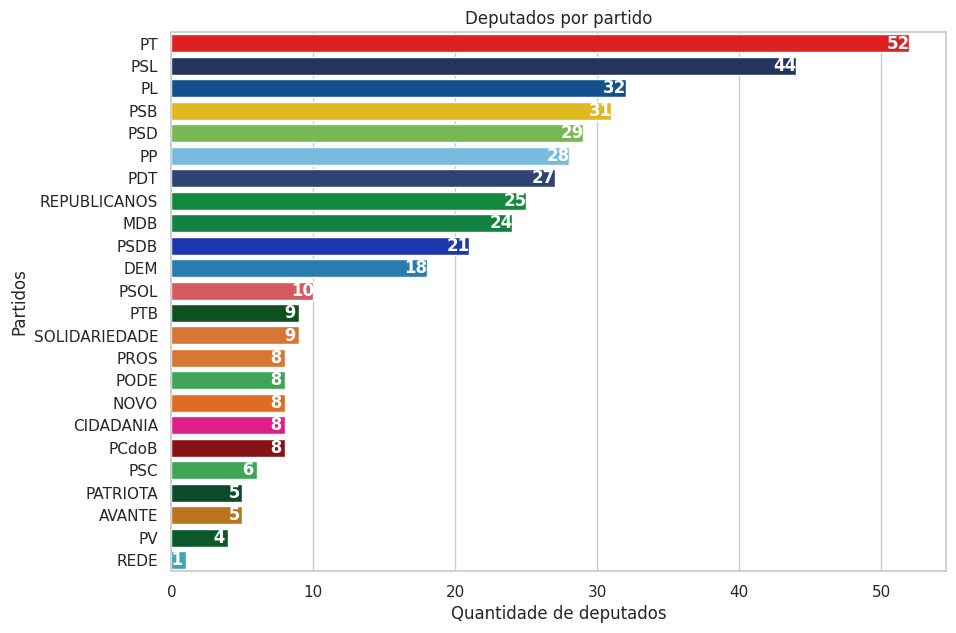

In [14]:
fig = plt.figure(figsize=(10, 7))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = dep_por_partido.sort_values(ascending=False)

ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette=CORES_PARTIDOS,)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - .015 * max(data),  
            s = f'{altura:>2}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
        )


plt.title('Deputados por partido')
plt.ylabel('Partidos')
plt.xlabel('Quantidade de deputados')
plt.show()

In [15]:
sum(dep_por_partido)

420

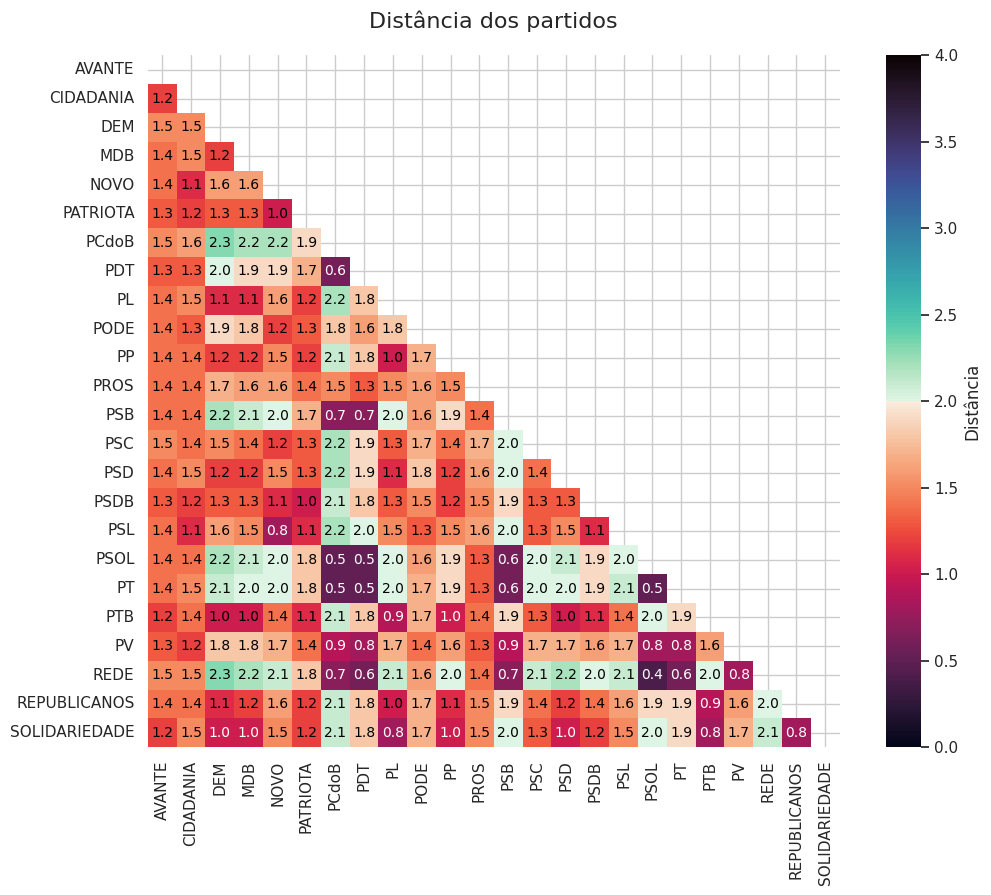

In [16]:
values = pd.DataFrame(networks[year].getPartiesDistances()).sort_index(axis=0).sort_index(axis=1)
mask = np.triu(np.ones_like(values, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    round(values, 1),
    mask=mask,
    vmax=4, 
    vmin=0,
    center=2,  
    annot=False,
    square=True,
    cbar_kws={"shrink": 1, "label": "Distância"},
    cmap= contrast_cmap
    )

for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not mask[i, j]:  # Ignora as células mascaradas
            value = values.iloc[i, j]
            text_color = "white" if value < 1 else "black"
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", 
                    ha="center", va="center", color=text_color, fontsize=10)

ax.set_title("Distância dos partidos", fontsize=16, pad=20)

plt.tight_layout()
plt.show()

In [17]:
lower_triangle_no_diag = np.tril(values.values, k=-1)

std = np.std(lower_triangle_no_diag[lower_triangle_no_diag != 0], ddof=0)

std

np.float64(0.41940438039920264)

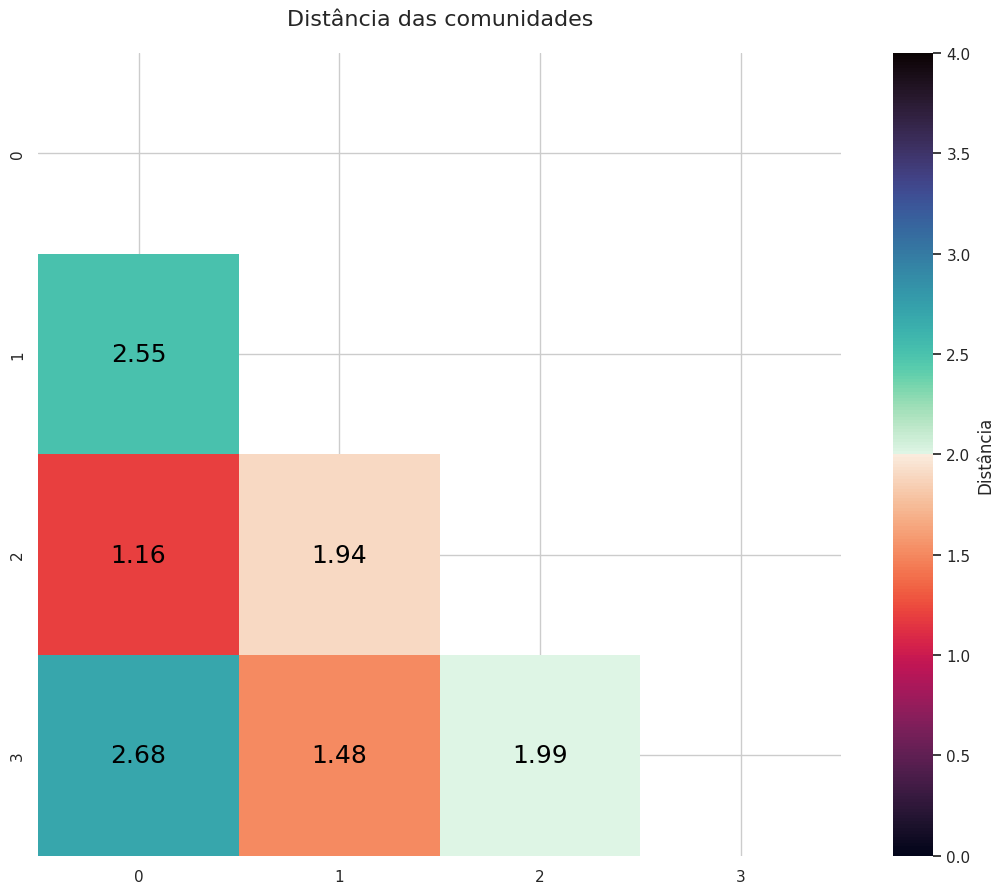

In [18]:
values = pd.DataFrame(networks[year].getCommunitiesDistances()).sort_index(axis=0).sort_index(axis=1)
mask = np.triu(np.ones_like(values, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    round(values, 1),
    mask=mask,
    vmax=4, 
    vmin=0,
    center=2,  
    annot=False,
    square=True,
    cbar_kws={"shrink": 1, "label": "Distância"},
    cmap= contrast_cmap
    )

for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not mask[i, j]:  # Ignora as células mascaradas
            value = values.iloc[i, j]
            text_color = "white" if value < 1 else "black"
            ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
                    ha="center", va="center", color=text_color, fontsize=18)

ax.set_title("Distância das comunidades", fontsize=16, pad=20)

plt.tight_layout()
plt.savefig("./imagens/distancia_comunidades_2019.jpg", format='jpg')
plt.show()

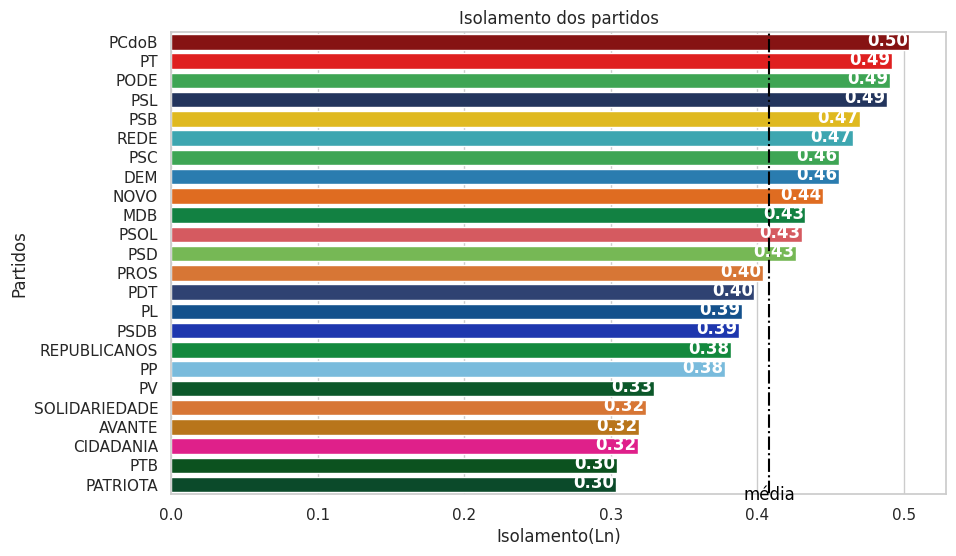

In [19]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getPartiesIsolation()).sort_values(ascending= False).apply(np.log)


ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette= CORES_PARTIDOS,
                 )


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - 0.03 * max(data),  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axvline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    x = data.mean(),
    y = len(data.index),
    s = 'média',
    ha='center', va='bottom', fontsize=12, color='black',
)


plt.title('Isolamento dos partidos')
plt.ylabel('Partidos')
plt.xlabel('Isolamento(Ln)')
plt.show()

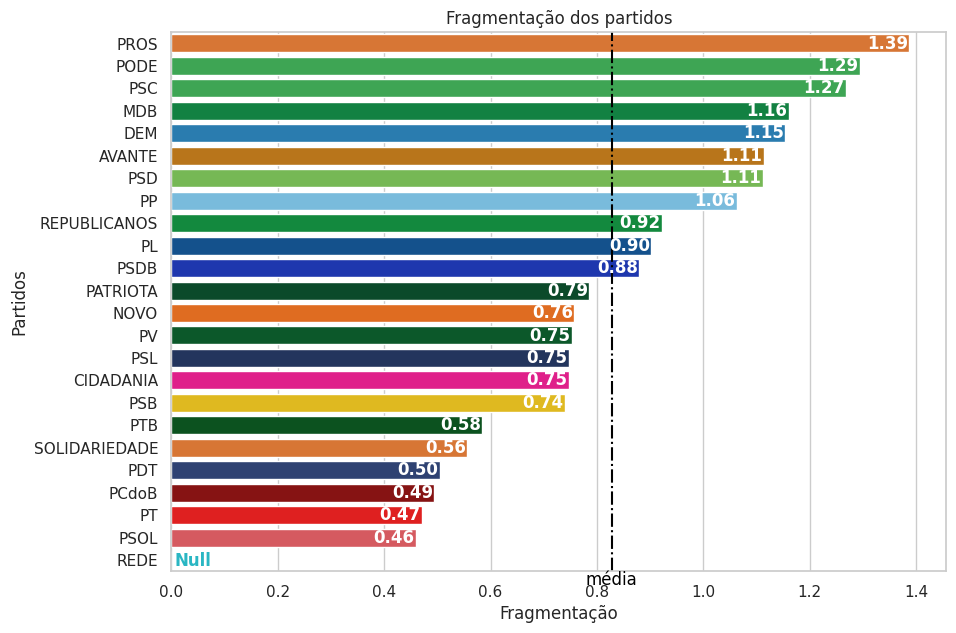

In [20]:
fig = plt.figure(figsize=(10, 7))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getPartiesFragmentation()).sort_values(ascending= False)

ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette= CORES_PARTIDOS,)

ax.text(
    x = 0.005,
    y = list(data.index).index('REDE') + .05,
    s = 'Null',
    ha='left', va='center', fontsize=12, color=CORES_PARTIDOS['REDE'], weight='bold',
)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - 0.03 * max(data),  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
        )


plt.axvline(data.mean(), color='#000', linestyle='dashdot', linewidth=1.5)
ax.text(
    x = 0 + data.mean(),
    y = len(data.index) + 0.3,
    s = 'média',
    ha='center', va='bottom', fontsize=12, color='black',
)


plt.title('Fragmentação dos partidos')
plt.ylabel('Partidos')
plt.xlabel('Fragmentação')
plt.show()

In [21]:
CORES_COMUNIDADES.keys

<function dict.keys()>

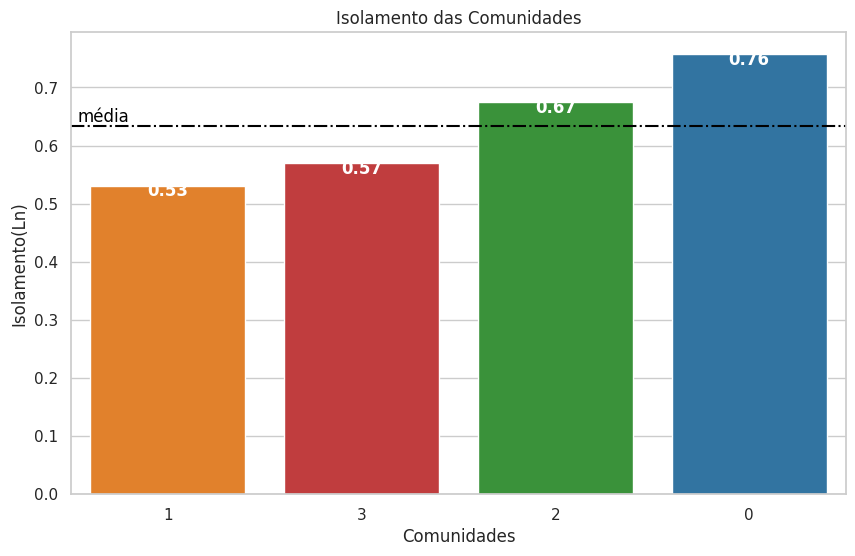

In [22]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getCommunitiesIsolation()).sort_values(ascending= True).apply(np.log)
data.index = data.index.to_series().astype(str)

ax = sns.barplot(x= data.index, 
                 y= data.values, 
                 hue= data.index,
                 palette= CORES_COMUNIDADES)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            x = bar.get_x() + bar.get_width()/2,  
            y = altura - 0.025,  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axhline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = data.mean(),
    x = - 0.2,
    s = 'média',
    ha='right', va='bottom', fontsize=12, color='black',
)


plt.title('Isolamento das Comunidades')
plt.xlabel('Comunidades')
plt.ylabel('Isolamento(Ln)')
plt.savefig('./imagens/isolamento_comunidades_2019.jpg', format='jpg')
plt.show()


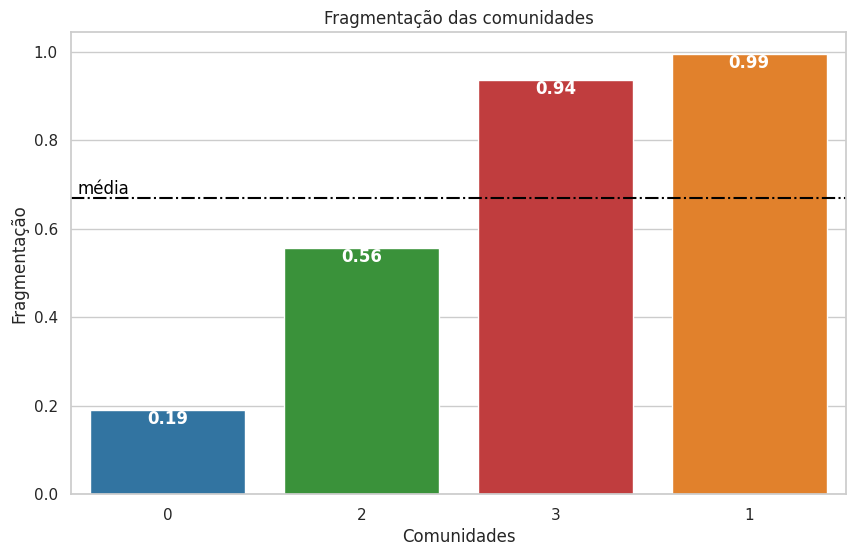

In [23]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getCommunitiesFragmentation()).sort_values(ascending= True)
data.index = data.index.to_series().astype(str)

ax = sns.barplot(x= data.index, 
                 y= data.values, 
                 hue= data.index,
                 palette= CORES_COMUNIDADES)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            x = bar.get_x() + bar.get_width()/2,  
            y = altura - 0.04,  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axhline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = data.mean(),
    x = - 0.2,
    s = 'média',
    ha='right', va='bottom', fontsize=12, color='black',
)


plt.title('Fragmentação das comunidades')
plt.xlabel('Comunidades')
plt.ylabel('Fragmentação')
plt.savefig('./imagens/fragmentacao_comunidades_2019.jpg',  format="jpg")
plt.show()


In [24]:
# Dicionário para guardar o DataFrame final de cada ano
communities_dfs = {} 

# Supondo que você tenha um loop de anos externo, ou para um ano específico:
# for year in years: (exemplo)

# 1. Coletamos os DataFrames de cada comunidade em um dicionário temporário
temp_dfs = {}

for community_key in networks[year].getCommunities().keys():
    community = pd.Series(networks[year].getPartiesInCommunity(community_key)).apply(len).astype(int)
    total = sum(community)
    print((total, community_key))
    
    # Cria o DataFrame daquela comunidade
    temp_dfs[f"Comunidade {community_key}"] = pd.DataFrame({
        'Deputados': community,
        'Porção presente': (community / dep_por_partido).dropna().mul(100).round(2),
        'Representatividade': (community / total).dropna().mul(100).round(2),
        # 'Isolamento': ...
    })

# 2. Concatenamos tudo no EIXO 1 (Colunas)
# As chaves do dicionário 'temp_dfs' viram o nível superior das colunas
df_year = pd.concat(temp_dfs.values(), axis=1, keys=temp_dfs.keys())

# Opcional: Dar nomes aos níveis das colunas para organização
df_year.columns.names = ['Comunidade', 'Métrica']

# 3. Salva no dicionário mestre
communities[year] = df_year.fillna('-')


(115, 1)
(163, 3)
(140, 2)
(2, 0)


In [25]:
print(communities[year].to_latex())

\begin{tabular}{lllllllllllll}
\toprule
Comunidade & \multicolumn{3}{r}{Comunidade 1} & \multicolumn{3}{r}{Comunidade 3} & \multicolumn{3}{r}{Comunidade 2} & \multicolumn{3}{r}{Comunidade 0} \\
Métrica & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade \\
\midrule
AVANTE & 2.000000 & 40.000000 & 1.740000 & 1.000000 & 20.000000 & 0.610000 & 2.000000 & 40.000000 & 1.430000 & - & - & - \\
CIDADANIA & 8.000000 & 100.000000 & 6.960000 & - & - & - & - & - & - & - & - & - \\
DEM & 2.000000 & 11.110000 & 1.740000 & 16.000000 & 88.890000 & 9.820000 & - & - & - & - & - & - \\
MDB & 4.000000 & 16.670000 & 3.480000 & 20.000000 & 83.330000 & 12.270000 & - & - & - & - & - & - \\
NOVO & 8.000000 & 100.000000 & 6.960000 & - & - & - & - & - & - & - & - & - \\
PATRIOTA & 3.000000 & 60.000000 & 2.610000 & 2.000000 & 40.000000 & 1.230000 & - & - & - & - &

In [26]:
df = communities[year].sort_index(axis=1)

# 2. Define o formatador geral (2 casas decimais para tudo, exceto o que sobrescrevermos depois)
styler = df.style.format(precision=2, na_rep="-")

# 3. Sobrescreve APENAS as colunas 'Deputados' para serem inteiros (0 casas)
# pd.IndexSlice[:, pd.IndexSlice[:, 'Deputados']] seleciona todas as linhas e as colunas onde o nível 1 é 'Deputados'
styler = styler.format(
    formatter="{:.0f}", 
    subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Deputados']],
    na_rep="-"
)

# 4. Aplica Negrito (\textbf) nos Índices
# axis=0: Linhas (Partidos)
styler = styler.format_index(axis=0, escape="latex", formatter=lambda x: f"\\textbf{{{x}}}")
# axis=1, level=0: Colunas nível superior (Comunidades)
styler = styler.format_index(axis=1, level=0, escape="latex", formatter=lambda x: f"\\textbf{{{x}}}")

# 5. Gera o LaTeX Final
latex_code = styler.to_latex(
    column_format="l" + "r" * len(df.columns), # 'l' para o índice, 'r' para todas as colunas de dados
    hrules=True,       # Usa linhas bonitas do pacote booktabs
    multicol_align="c", # Centraliza o nome das comunidades
    clines="skip-last;data" # Melhora as linhas horizontais internas
)

print(latex_code)

ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
communities[year][1].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,Porção presente,Representatividade,Isolamento
PSL,44,100.00,38.26,1.022787
PSDB,18,85.71,15.65,1.075199
CIDADANIA,8,100.00,6.96,1.142954
NOVO,8,100.00,6.96,0.906077
PP,6,21.43,5.22,1.094387
PODE,5,62.50,4.35,0.970008
PSD,5,17.24,4.35,1.212643
MDB,4,16.67,3.48,1.088200
PATRIOTA,3,60.00,2.61,0.925570
AVANTE,2,40.00,1.74,0.959221


In [ ]:
communities[year][1]["Deputados por partido"].sum()

np.int64(115)

In [ ]:
communities[year][2].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PT,52,100.00,0.548153
PSB,29,93.55,0.609417
PDT,27,100.00,0.564319
PSOL,10,100.00,0.521861
PCdoB,8,100.00,0.596378
PV,3,75.00,0.555229
PROS,2,25.00,0.468159
AVANTE,2,40.00,0.473409
PODE,2,25.00,0.818165
REPUBLICANOS,2,8.00,0.723947


In [ ]:
communities[year][2]["Deputados por partido"].sum()

np.int64(140)

In [ ]:
communities[year][0].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PODE,1,12.5,0.381356
PROS,1,12.5,0.381356


In [ ]:
communities[year][0]["Deputados por partido"].sum()

np.int64(2)

In [ ]:
communities[year][3].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PL,30,93.75,0.922021
PSD,23,79.31,0.971327
PP,22,78.57,0.958189
REPUBLICANOS,22,88.00,0.900365
MDB,20,83.33,1.016534
DEM,16,88.89,0.987618
PTB,9,100.00,0.894101
SOLIDARIEDADE,9,100.00,0.833608
PROS,3,37.50,1.000856
PSC,3,50.00,1.052278


##### Analise

Os números ajudam a ver com mais detalhes as comunidades. A comunidade 3 aparenta ainda mais ser um artefato, já que ela possui apenas 3 deputados (0.7%).

Dito isso, uma das comunidades(1) representa todo o bloco de oposição já que o executivo se posicionava a direita([aqui](analise.ipynb#contextualização-da-posição-do-governo-no-período)). Essa comunidade tem 139(32,8%) deputados, formada principalmente pelo PT, PSB, PDT, PSOL e PCdoB, ela tem uma fragmentação de 0.49, a mais baixa se desconsiderar-se o artefato. O que mostra que a comunidade é mais coesa que as outras. A comunidade tem 0.52 de isolamento, o mais alto das 4 o que é de se esperar por representar toda a oposição.

Além dessa, existem outras duas comunidades uma de 192 deputados e uma de 88. A primeira(2) é a maior comunidade, ela é composta principalmente pelo PL, PSD, PP MDB, Republicanos, PSDB, DEM, PTB e Soliedaridade, partidos de direita e centro, o que mostra que essa comunidade compõe o bloco governista. Sua fragmentação é de 0.89, a maior fragmentação, o que é compreensivel já que é a maior comunidade da rede e possui muitos partidos que a compõem. Já o isolamento é de 0.43, levente abaixo da média.

Já a última comunidade(0), a menor comunidade se desconsiderar a comunidade artefato, é formada principalmente pelo PSL(50% da comunidade), NOVO, CIDADANIA, PODE e alguns membros do PSDB. Sua fragmentação é de 0.86, muito próxima da comunidade 2. Isso se deve porque a comunidade têm varias deputados dos principais partidos da comunidade 2, um pouco mais de 10%. Já seu isolamento é de 0.35, o menor de todos e bem abaixo da média. Isso mostra um comportamento mais conciliador da comunidade, umas vez que o principal partido da comunidade é o partido do atual executivo, tentando contruir essa boa relação com demais deputasdos, contudo, isso acontece mais com partidos de direita, já que a distância entre a comunidade 0 e 2 é a menor de todas com 1.26. Isso demonstra como ambas as comunidades compõem o bloco Governista. A dúvida é o que tanto se difere do comportamento desses deputados para que o blocxo governista se dividisse em duas comunidas?

#### Analise Textual

Indo para a analise dos discursos conseguimos as resposta para o questionamento e mais detalhes que comprovam as hipóteses. A comunidade 2 defendeu a PEC 98/2019, reforma da previdência, e a PEC 187/2019, que tinha carater de austeridade fiscal nos discursos de seus deputados. Defendeu a exploração dos recursos na Amazônia e o porte de armas de agricultores para a resolução de problemas no campo. Além disso, demonstrou desconfiança com a esqurda, repudiou o PL 2269/2015 que defendia a reformulação da definição de família, e criticou a atuação do executivo, o que pode ser uma explicação para o distanciamento com a comunidade 0. 
  
Já a comunidade 0, manteve seu discurso no entorno da austeridade fiscal e tributário, além da defesa da liberdade de expressão, o que mostra um leve distanciamento das pautas da comunidade 2, além disso defendeu em seus discursos o apio ao governo para melhor governabilidade, o que explica a comunidade 0 ter o menor isolamento, tentanto uma postura um pouco mais conciliadora.

Quando chega-se na comunidade 3, que aparentava ser um artefato, percebe-se que o discurso fica em torno de pautas critãs e conservadoras em relação a família, além da liberdade de expressão. Como a comunidade têm apenas 3 deputados os resumos podem não ser tão representativos em relação aos votos dos candidatos, mas já da pistas de que a comunidade realmente não seja um artefato, validando mais ainda a escolha do algoritmo de detecção de comunidades.

Porfim, a comunidade 1 defende a proteção do meio ambiente e biodiversidade e o combate a queimada e o desmatamento. Defendeu a proteção dos povos indígenas e demarcação de terras, Além da c'ritica a Reforma Tributária. Pautas bem opostas as demais comunidades, explicando o isolamento da comunidade ser o mais alto da rede.

Vale ressaltar que existem alguns pontos em comum entre as comunidades.

### 2020

In [30]:
year = 2020

#### Análise Qualitativa

![Partidos 2020](../imagens/2020_p.jpg)

Novamente se ve os partidos organizados entre o bloco Governista e o bloco da Oposição. O bloco da oposição desta vez se mostra desoeso entre si mas coeso em seus sub grupos, formando duas regiões uma com o PT e o PSOL e uma com PSB, PCdoB e PDT. Quando se olha o bloco Governista els se organizam em uma grande região pouco coesa, com excessão do NOVO que se encontra bem coeso dentro da regiã. Além disso é possivel ver uma concentração do PSDB numa região mais ao centro do espetro. 

![Comunidades 2020](../imagens/2020_c.jpg)

Quando se olha as comunidades os palpites se comprovam: o bloco governista em uma unica comunidade, enquanto o bloco da oposição se encontra em três comunidades, uma mais o centro, e uma mais a esquerda do espectro Além disso pode-se ver mais dois possiveis artefatos, uma no centro e uma isolada na região governista.

#### Análise Qualitativa

##### Métricas

In [31]:
networks[year].avarege_distance

np.float64(2.201834670782436)

In [32]:
dep_por_partido = pd.Series({party: len(networks[year].parties[party]) for party in networks[year].parties})

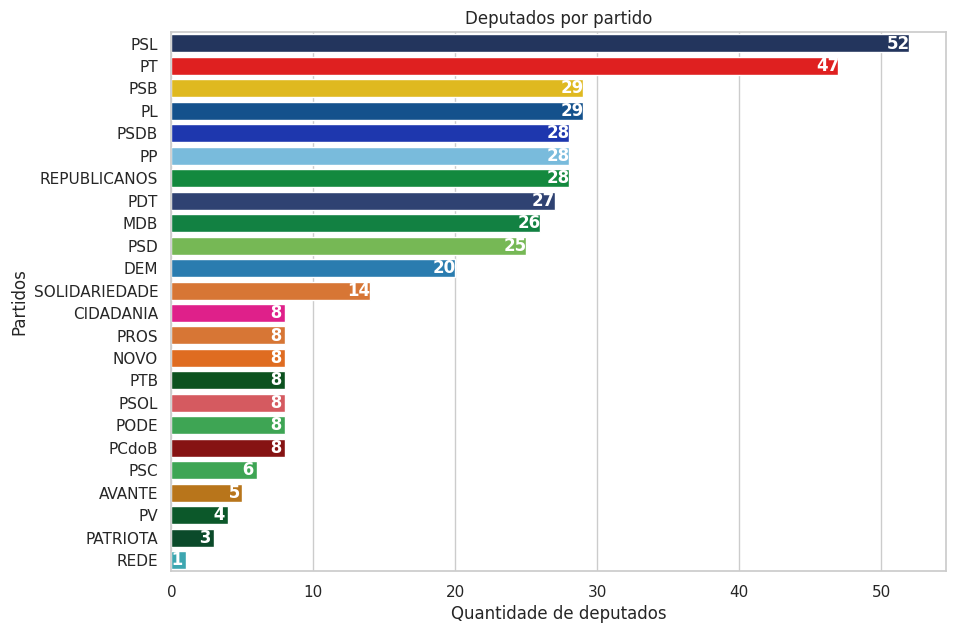

In [33]:
fig = plt.figure(figsize=(10, 7))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = dep_por_partido.sort_values(ascending=False)

ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette=CORES_PARTIDOS,)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - .015 * max(data),  
            s = f'{altura:>2}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
        )


plt.title('Deputados por partido')
plt.ylabel('Partidos')
plt.xlabel('Quantidade de deputados')
plt.show()

In [34]:
sum(dep_por_partido)

428

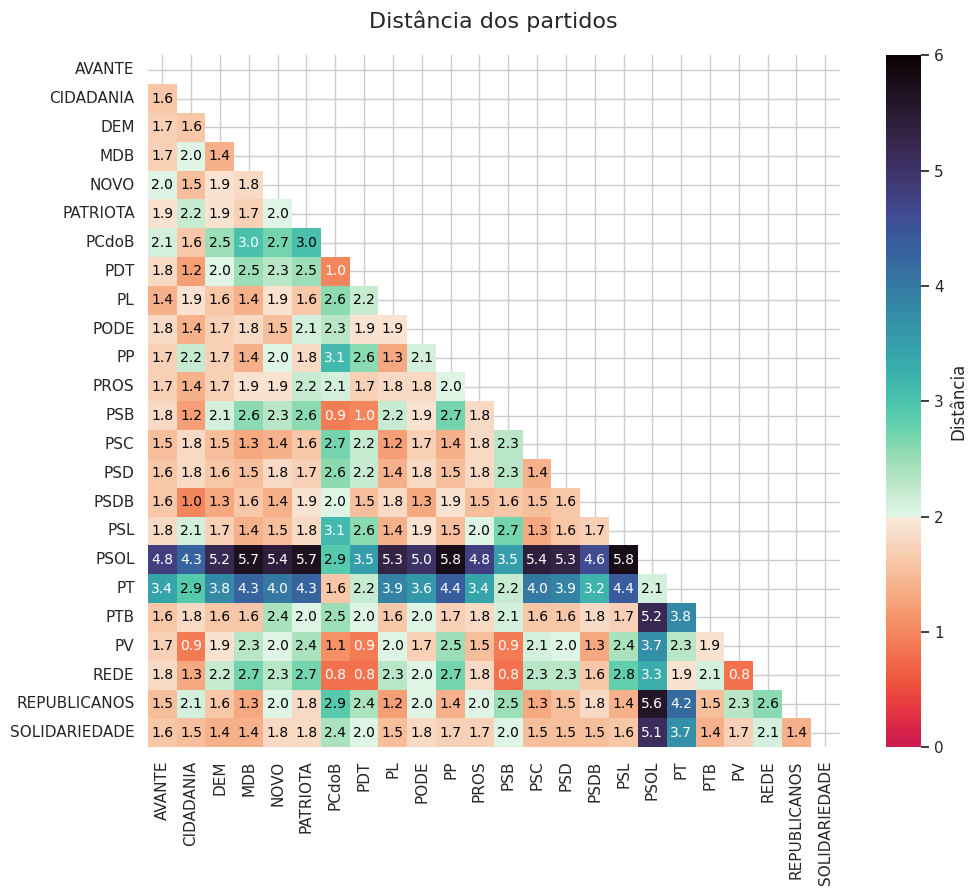

In [35]:
values = pd.DataFrame(networks[year].getPartiesDistances()).sort_index(axis=0).sort_index(axis=1)
mask = np.triu(np.ones_like(values, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    round(values, 1),
    mask=mask,
    vmax=6, 
    vmin=0,
    center=2,  
    annot=False,
    square=True,
    cbar_kws={"shrink": 1, "label": "Distância"},
    cmap= contrast_cmap
    )


for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not mask[i, j]:  # Ignora as células mascaradas
            value = values.iloc[i, j]
            text_color = "white" if value < 1 or value > 3 else "black"
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", 
                    ha="center", va="center", color=text_color, fontsize=10)

ax.set_title("Distância dos partidos", fontsize=16, pad=20)

plt.tight_layout()
plt.savefig('./imagens/distancia_partidos_2020.jpg', format='jpg')
plt.show()

In [36]:
lower_triangle_no_diag = np.tril(values.values, k=-1)

std = np.std(lower_triangle_no_diag[lower_triangle_no_diag != 0], ddof=0)

std

np.float64(1.03606494052798)

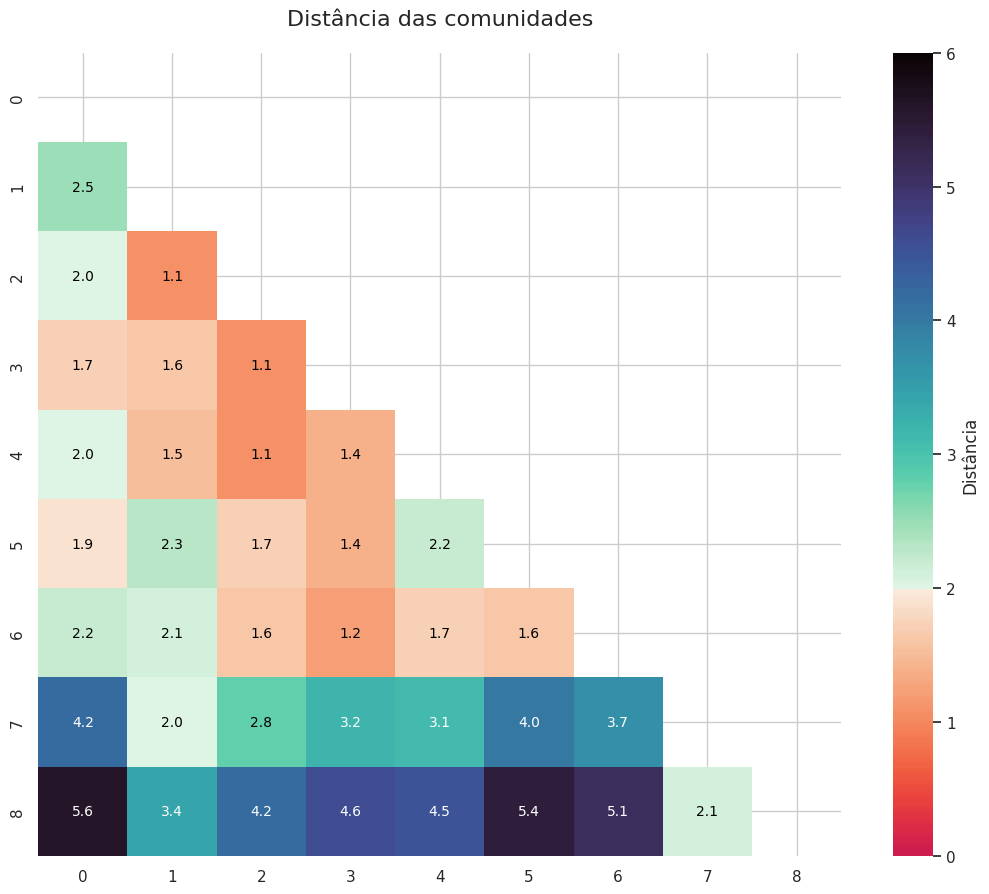

In [37]:
values = pd.DataFrame(networks[year].getCommunitiesDistances()).sort_index(axis=0).sort_index(axis=1)
mask = np.triu(np.ones_like(values, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(
    round(values, 1),
    mask=mask,
    vmax=6, 
    vmin=0,
    center=2,  
    annot=False,
    square=True,
    cbar_kws={"shrink": 1, "label": "Distância"},
    cmap= contrast_cmap  
    )

for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        if not mask[i, j]:  # Ignora as células mascaradas
            value = values.iloc[i, j]
            text_color = "white" if value < 1 or value > 3 else "black"
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", 
                    ha="center", va="center", color=text_color, fontsize=10)

ax.set_title("Distância das comunidades", fontsize=16, pad=20)

plt.tight_layout()
plt.show()

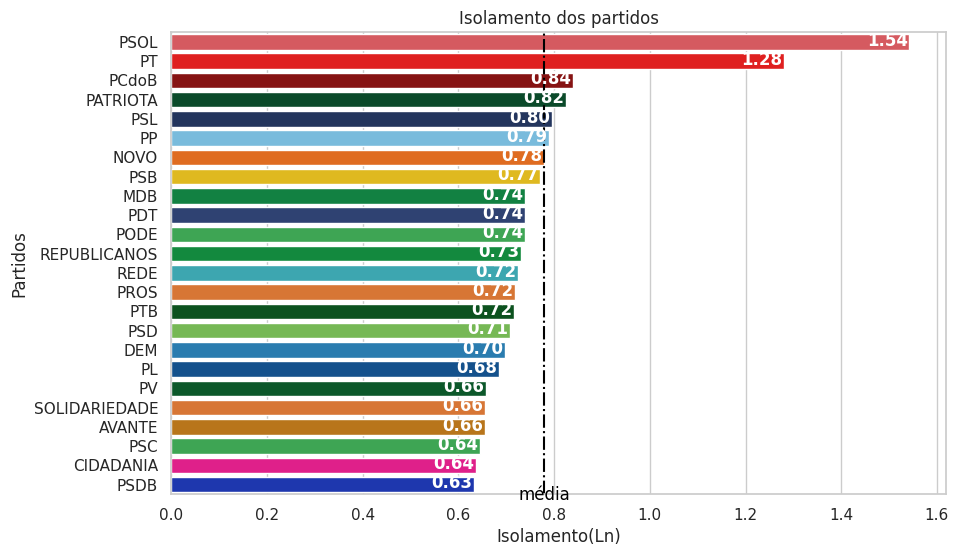

In [38]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getPartiesIsolation()).sort_values(ascending= False).apply(np.log)


ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette=CORES_PARTIDOS,
                 )


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - 0.03 * max(data),  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axvline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    x = data.mean(),
    y = len(data.index),
    s = 'média',
    ha='center', va='bottom', fontsize=12, color='black',
)


plt.title('Isolamento dos partidos')
plt.ylabel('Partidos')
plt.xlabel('Isolamento(Ln)')
plt.show()

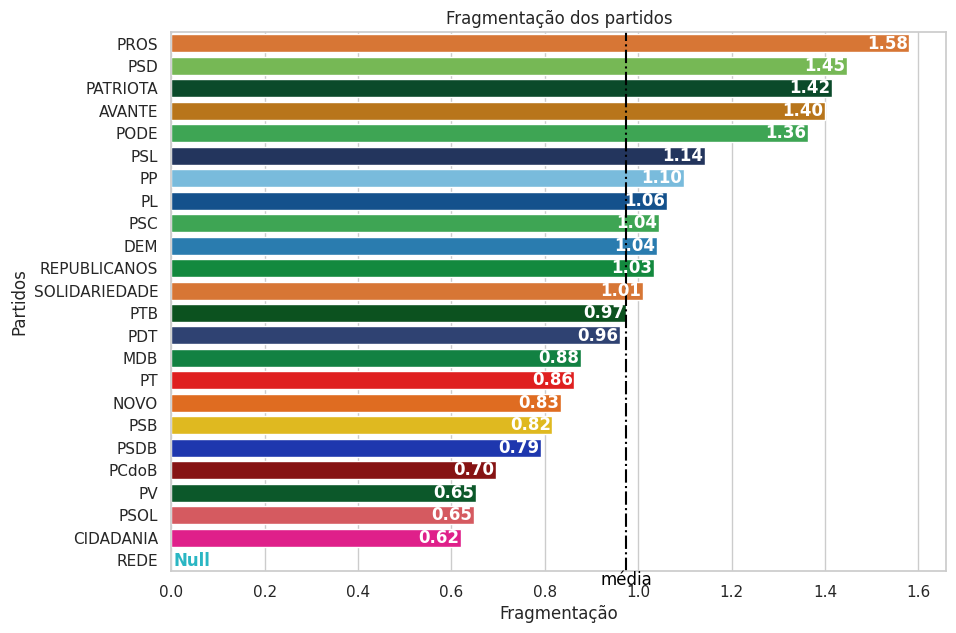

In [39]:
fig = plt.figure(figsize=(10, 7))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getPartiesFragmentation()).sort_values(ascending= False)

ax = sns.barplot(y= data.index, 
                 x= data.values, 
                 hue= data.index, 
                 palette=CORES_PARTIDOS,)

ax.text(
    x = 0.005,
    y = list(data.index).index('REDE') + .05,
    s = 'Null',
    ha='left', va='center', fontsize=12, color=CORES_PARTIDOS['REDE'], weight='bold',
)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            y = bar.get_y() + bar.get_height(),  
            x = altura - 0.03 * max(data),  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
        )


plt.axvline(data.mean(), color='#000', linestyle='dashdot', linewidth=1.5)
ax.text(
    x = 0 + data.mean(),
    y = len(data.index) + 0.3,
    s = 'média',
    ha='center', va='bottom', fontsize=12, color='black',
)


plt.title('Fragmentação dos partidos')
plt.ylabel('Partidos')
plt.xlabel('Fragmentação')
plt.savefig('./imagens/fragmentacao_partidos_2020.jpg', format='jpg')
plt.show()

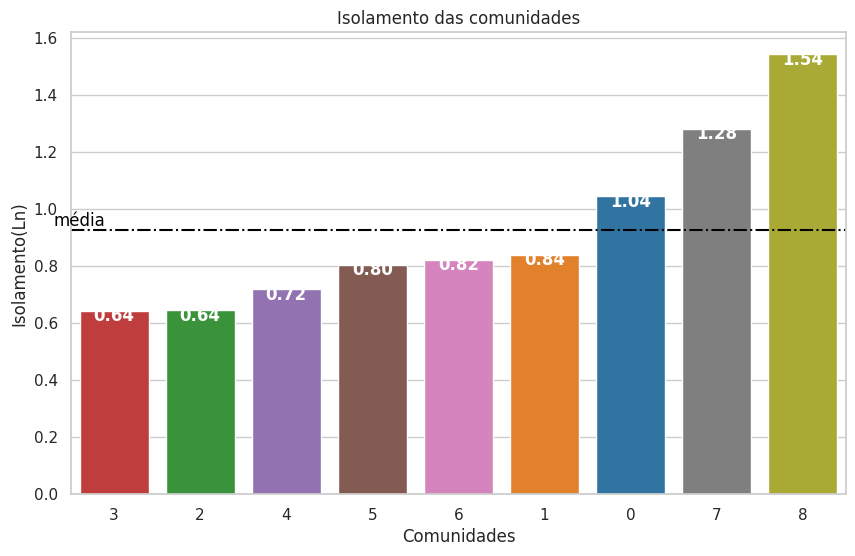

In [40]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getCommunitiesIsolation()).sort_values(ascending= True).apply(np.log)
data.index = data.index.to_series().astype(str)

ax = sns.barplot(x= data.index, 
                 y= data.values, 
                 hue= data.index,
                 palette= CORES_COMUNIDADES)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            x = bar.get_x() + bar.get_width()/2,  
            y = altura - 0.05,  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axhline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = data.mean(),
    x = - 0.1,
    s = 'média',
    ha='right', va='bottom', fontsize=12, color='black',
)


plt.title('Isolamento das comunidades')
plt.xlabel('Comunidades')
plt.ylabel('Isolamento(Ln)')
plt.savefig('./imagens/isolamento_comunidades_2020.jpg', format='jpg')
plt.show()

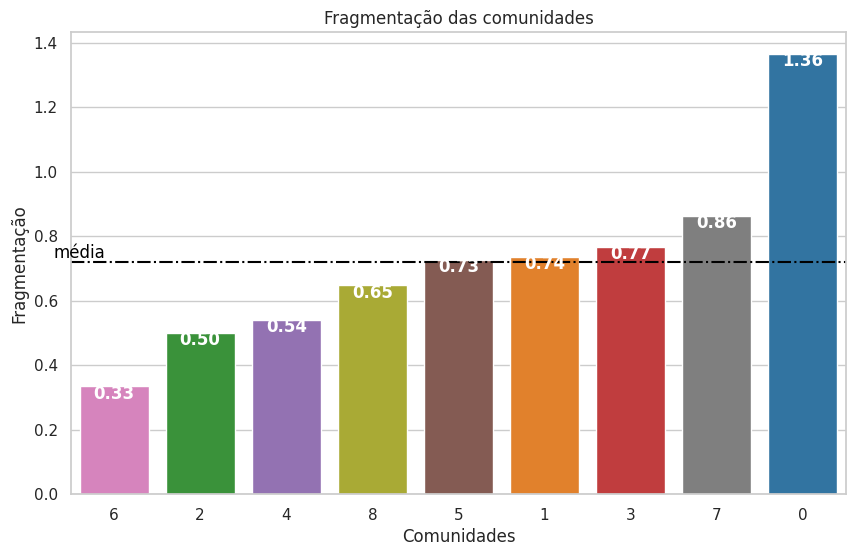

In [41]:
fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = pd.Series(networks[year].getCommunitiesFragmentation()).sort_values(ascending= True)
data.index = data.index.to_series().astype(str)

ax = sns.barplot(x= data.index, 
                 y= data.values, 
                 hue= data.index,
                 palette= CORES_COMUNIDADES)


for bar, altura in zip(ax.patches, data.values):
    if altura > 0:
        ax.text(
            x = bar.get_x() + bar.get_width()/2,  
            y = altura - 0.05,  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='white', weight= 'bold',
            
        )

plt.axhline(data.mean(), color='black', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = data.mean(),
    x = - 0.1,
    s = 'média',
    ha='right', va='bottom', fontsize=12, color='black',
)


plt.title('Fragmentação das comunidades')
plt.xlabel('Comunidades')
plt.ylabel('Fragmentação')
plt.savefig('./imagens/fragmentacao_comunidades_2020.jpg', format='jpg')
plt.show()

In [42]:
# Dicionário para guardar o DataFrame final de cada ano
communities_dfs = {} 

# Supondo que você tenha um loop de anos externo, ou para um ano específico:
# for year in years: (exemplo)

# 1. Coletamos os DataFrames de cada comunidade em um dicionário temporário
temp_dfs = {}

for community_key in networks[year].getCommunities().keys():
    community = pd.Series(networks[year].getPartiesInCommunity(community_key)).apply(len).astype(int)
    total = sum(community)
    print((total, community_key))
    
    # Cria o DataFrame daquela comunidade
    temp_dfs[f"Comunidade {community_key}"] = pd.DataFrame({
        'Deputados': community,
        'Porção presente': (community / dep_por_partido).dropna().mul(100).round(2),
        'Representatividade': (community / total).dropna().mul(100).round(2),
        # 'Isolamento': ...
    })

# 2. Concatenamos tudo no EIXO 1 (Colunas)
# As chaves do dicionário 'temp_dfs' viram o nível superior das colunas
df_year = pd.concat(temp_dfs.values(), axis=1, keys=temp_dfs.keys())

# Opcional: Dar nomes aos níveis das colunas para organização
df_year.columns.names = ['Comunidade', 'Métrica']

# 3. Salva no dicionário mestre
communities[year] = df_year.fillna('-')

(239, 0)
(71, 1)
(12, 2)
(29, 3)
(6, 4)
(13, 5)
(3, 6)
(47, 7)
(8, 8)


In [43]:
print(communities[year].to_latex())

\begin{tabular}{llllllllllllllllllllllllllll}
\toprule
Comunidade & \multicolumn{3}{r}{Comunidade 0} & \multicolumn{3}{r}{Comunidade 1} & \multicolumn{3}{r}{Comunidade 2} & \multicolumn{3}{r}{Comunidade 3} & \multicolumn{3}{r}{Comunidade 4} & \multicolumn{3}{r}{Comunidade 5} & \multicolumn{3}{r}{Comunidade 6} & \multicolumn{3}{r}{Comunidade 7} & \multicolumn{3}{r}{Comunidade 8} \\
Métrica & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade & Deputados & Porção presente & Representatividade \\
\midrule
AVANTE & 3.000000 & 60.000000 & 1.260000 & 2.000000 & 40.000000 & 2.820000 & - & - & - & - & - & - & - & - & - & - & - & - & - & - & - & 

In [44]:
communities[year] = {}

for community_key in networks[year].getCommunities().keys():
    community = pd.Series(networks[year].getPartiesInCommunity(community_key)).apply(len)
    
    communities[year][community_key] = pd.DataFrame({
        'Deputados por partido': community,
        '% Partido na Comunidade':(community / dep_por_partido).dropna().mul(100).round(2),
        'Isolamento': networks[year].getPartiesInCommunitiesIsolation()[community_key]
    })

In [45]:
communities[year][0].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PSL,51,98.08,1.425071
PP,28,100.00,1.438122
PL,28,96.55,1.327972
REPUBLICANOS,27,96.43,1.341351
MDB,26,100.00,1.363417
PSD,20,80.00,1.383888
DEM,19,95.00,1.571266
SOLIDARIEDADE,12,85.71,1.379532
PTB,8,100.00,1.591048
PSC,5,83.33,1.227319


In [46]:
communities[year][0]['Fragmentação Geral'] = pd.Series(networks[year].getPartiesFragmentation()).sort_values(ascending= False)

In [47]:
communities[year][0].columns

Index(['Deputados por partido', '% Partido na Comunidade', 'Isolamento',
       'Fragmentação Geral'],
      dtype='object')

/tmp/ipykernel_15815/4168183450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Deputados por partido", "% Partido na Comunidade"], inplace= True)


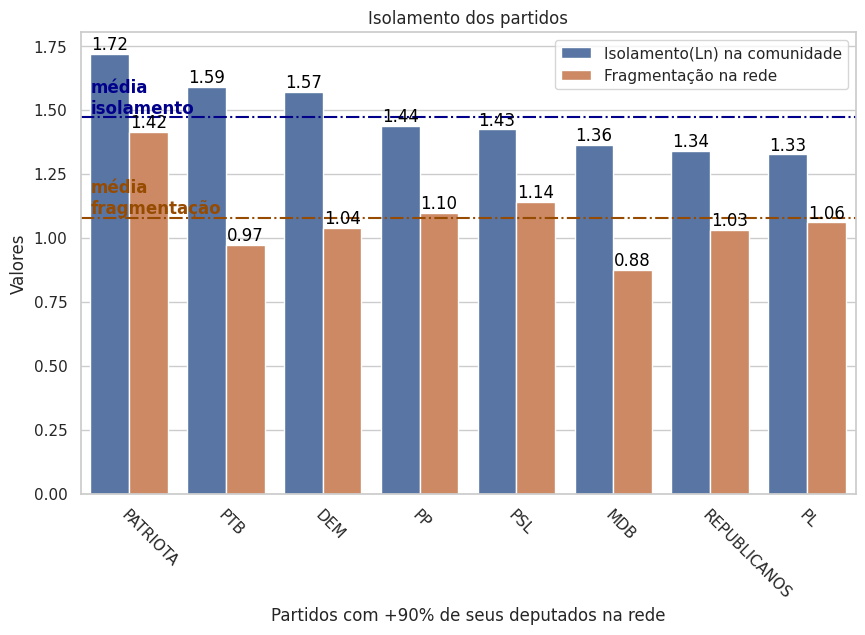

In [48]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

data = communities[year][0][communities[year][0]['% Partido na Comunidade'] > 90]
data.drop(columns=["Deputados por partido", "% Partido na Comunidade"], inplace= True)
data = data.melt(var_name='vars', value_name='values', ignore_index=False)
data_isolation = data[data['vars'] == 'Isolamento'].sort_values(by='values', ascending= False)
data_fragmentation = data[data['vars'] != 'Isolamento'].reindex(data_isolation.index)
data = pd.concat([data_isolation, data_fragmentation])
mean_isolation = data_isolation['values'].mean()
mean_fragmentation = data_fragmentation['values'].mean()
del data_isolation, data_fragmentation
data['vars'] = data['vars'].map({
    'Isolamento': 'Isolamento(Ln) na comunidade',
    'Fragmentação Geral': 'Fragmentação na rede'
})

ax = sns.barplot(x= data.index, 
                 y= data['values'], 
                 hue= data['vars'],
                 )


for bar, altura in zip(ax.patches, data['values']):
    if altura > 0:
        ax.text(
            x = bar.get_x() + bar.get_width()/2,  
            y = altura,  
            s = f'{altura:>2.2f}',  
            ha='center', va='bottom', fontsize=12, color='black',
            
        )

plt.axhline(mean_isolation, color='darkblue', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = mean_isolation,
    x = -0.4,
    s = 'média\nisolamento',
    ha='left', va='bottom', fontsize=12, color='darkblue', weight='bold',
)


plt.axhline(mean_fragmentation, color='#964b00', linestyle='dashdot', linewidth=1.5)
ax.text(
    y = mean_fragmentation,
    x = -0.4,
    s = 'média\nfragmentação',
    ha='left', va='bottom', fontsize=12, color='#964b00', weight='bold',
)

plt.xticks(rotation=-45, ha='left', rotation_mode='anchor')
plt.legend(title=None)
plt.title('Isolamento dos partidos')
plt.xlabel('Partidos com +90% de seus deputados na rede')
plt.ylabel('Valores')
plt.savefig('./imagens/isolamento_comunidade0_2020.jpg', format='jpg')
plt.show()

In [49]:
communities[year][0].sort_values('Isolamento', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento,Fragmentação Geral
PATRIOTA,3,100.00,1.719477,1.415399
PTB,8,100.00,1.591048,0.974066
PROS,3,37.50,1.584377,1.581043
DEM,19,95.00,1.571266,1.040747
PP,28,100.00,1.438122,1.097902
PSL,51,98.08,1.425071,1.142009
PSD,20,80.00,1.383888,1.447130
SOLIDARIEDADE,12,85.71,1.379532,1.010077
MDB,26,100.00,1.363417,0.876624
PODE,2,25.00,1.356041,1.362682


In [50]:
communities[year][0]["Deputados por partido"].sum()

np.int64(239)

In [51]:
communities[year][4].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PSD,4,16.00,0.672199
PDT,1,3.70,0.672199
SOLIDARIEDADE,1,7.14,0.698755


In [52]:
communities[year][2].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
CIDADANIA,7,87.5,0.540842
PROS,2,25.0,0.600000
PV,2,50.0,0.428008
PODE,1,12.5,0.579027


In [53]:
communities[year][2]["Deputados por partido"].sum()

np.int64(12)

In [54]:
communities[year][3].sort_values('Deputados por partido', ascending=False).to_markdown()

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [ ]:
communities[year][1].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PDT,23,85.19,0.640991
PSB,22,70.97,0.657154
PCdoB,8,100.00,0.708454
PV,2,50.00,0.575859
AVANTE,1,16.67,0.737824
PL,1,3.57,0.683898
REDE,1,100.00,0.613276


In [ ]:
communities[year][1]["Deputados por partido"].sum()

58

In [ ]:
communities[year][5].sort_values('Deputados por partido', ascending=False)

,Deputados por partido,% Partido na Comunidade,Isolamento
PT,51,100.0,1.420178
PSOL,8,100.0,1.420178


In [ ]:
communities[year][5]["Deputados por partido"].sum()

59

##### Analise

Quando comparado com o ano de 2019, a rede de 2020 tem uma distância média bem maior, um aumento de 36,6% esse impacto é perceptívelna distancia entre os partidos que teve um desvio padrão duas vezes maior.

Indo para as comunidades, 4 grandes comunidades de 2 possiveis artefatos. Dessas, a comunidade 0 representa o bloco Governista, com 288 deputados, uma comunidade gigantesca com 66.67% dos deputados do ano de 2020. Composta pelo PSL, PP, REPUBLICANOS, PSDB, PL, PSD, DEM, MDB, SOLIEDARIEDADE, NOVO, CIDADANIA, PTB, PSC, PATRIOTA. A comunidade tem um a fragmentação de 1.14, a maior de todas as comunidades, o que é compreensível devido ao seu tamanho. Quando se olha com mais detalhes os partidos dentro da comunidade vê se partidos com isolamento levemente maior( por volta de 1.3), demonstrando que, mesmo dentro de uma mesma comunidade e votando em conjunto, alguns partidos votam levemente diferente em relação aos demais. Quando soma-se isso a uma análise da fragmentação dos partidos que compões esse grupo, alguns desses partidos com isolamento mais alto tem uma fragmentação bem baixa formando "panelinhas" dentro da comunidades. Esse partdidos são o PSDB, NOVO E CIDADANIA. Analisando o Isolamento desses partidos, o PSDB e o CIDADANIA tem as os dois menores isolamentos da rede, mostrando uma posição mais concialiadora em relação a comunidade 0, enquanto o NOVO tem o terceiro maior isolamento dos partidos quer compõem a comunidade 0, mostrando uma posição mais radical em relação a rede. Os resumos podem confirmar isso?

Próximo a 0 existe a comunidade 4 que aparenta ser um artefato, possui apenas 3 deputados do partido PODE, representando 33% da composição do partidos e 0.69% da rede. 

Indo mais ao centro, existe a comunidade 2, uma comunidade pequena, de 20 deputados,4.63%, composta por alguns deputados da esquerda, alguns membros do PSB, PDT e PV, e alguns membros da direita, um membros do AVANTE, PODE, PSD, PSDB, PL e PSL, além disso alguns partidos pequenos tem mais de 50% de seus mebros nessa rede, partidos como PROS e o PV. ë uma rede cm uma fragemntação abaixo da média com 0.43 e seu isolamento é o mais baixo de todos, compreensivel uma vez que é uma comunidade que representa o centro do espectro político.

Levemente ligada a comunidade 2 tem a 3, outra comunidade que aparenta ser um artefato com 4 deputados de partidos diferentes.

Chegando a Esquerda do espectro, existem 2 comunidades, a comunidade 1, mais ao cento e a 5 mais a esquerda. A comunidade 1 é média com 58 deputados, 13.42% da comunidade. A comunidade é formada pelo PDT, boa parte do PSB e todo o PCdoB. ë uma comunidade com isolamento de 0.67 e, abaixo da média, o que é compreensível devido a posição mais ao centro, mesmo que a esquerda. Já sua fragmentação é de 0.64, bem próximo da média. Por fim a comunidade 5 é uma comunidade 5 também é média, com 59% dos deputados da rede, 13.66% formada por 100% do PT e do PSOL. A comunidade tem um isolamento 1.04, o maior dentro as demais, o que mostra uma posição mais extrema. Já sua fragmentação é de 0.86, bem acima da média e a segunda maior. Quando se olha pro isolamento interno, isso se torna compreensível uma vez que os partdios tem 1.42 de isolamento entre si. Isso é espresso na distancia dos partidos. O PT etsa mais próximo do PCdoB, que está na comuniddade 1, do que o PSOL,  que esta na própria comunidade. E quando se olha para a fragmentação desses partidos, o PSOL tema a mais baixa da rede, 0.59, e o PT uma das mais baixas, 0.69, mostrando que os partidos são coesos, mas se distanciam, podendo até dizer que eles poderiam ser de outra comunidade. levando isso em conta, o que descoesinou tanto o campo da oposição para formar duas comunidades, e o que diferencia tanto o PSOl do PT?



#### Analise Textual

A comunidaade 0 Defende a cooperação pupblico privada, segurança financeirar controle da dívida, liberdade de expressão , diminuição da cicotomia entre servidores públicos e a socviedade, garantirm a liberdade e responsabilidade dos gestores locais(prefeitos e governadores). Quando olhamos pros partidos destacados anteriormente. O PSDB e o CIDADANIA defendem uma intervenção para conter a pandemia, o que entre em contraste com a defesa da liberdade e resposabilidade de gestores do locais do resto da comunidade. Já o partido NOVO uma menor intervenção do Estado na econômia, o que difere a comunidade conter os gastos e a divida pública. Comprovando as hipóteses apresentadas anteriormente.

A comunidade 4 Apoia o FUNDEB. Mas pouco conclusiva para dizer que náo é um artefato, já que muito do quer foi resumido não se refere a situação nacional. Analise conclusiva apenas analisando a proposições votadas.

Comunidade 2 foca em defender os idosos e população vulneravel durante a pandemia, além de defenderem a reforma da previdência.

Comunidade 3 não têm nada conclusivo, defendem um projeto especifico de escopo local.

Comunidade 1 Defende a Reforma do FUNDEB, proteção da vida da população. Defesa dos servidores públicos. Proteção da economia e gerar empregos. Além disse diversas críticas ao Governo Bolsonaro e sua gestão da pandemia e por ir contra a orientações da OMS, além decríticas relacionadas a valorização da ditadura millitar. 

Comunidade 5 - LLama Bugou, vou regerar.